In [86]:
#Import libraries
import numpy as np
import pandas as pd
#Import Dataset
df = pd.read_csv("./mail_data.csv")
df.shape

(5572, 2)

In [87]:
# Select Only Data that is not null
data = df.where(pd.notnull(df), '')

# Change spam and ham cateogry to 0 and 1
data.loc[data['Category'] == 'spam', 'Category',] = 0
data.loc[data['Category'] == 'ham', 'Category',] = 1

X = data['Message']
Y = data['Category']

In [88]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [89]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [91]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [92]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(5572,)
(4457,)
(1115,)


In [93]:
# Transform Data to Feature Vector
from sklearn.feature_extraction.text import TfidfVectorizer
feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase = True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [94]:
print(X_train_features)

  (0, 3422)	0.6418008618863358
  (0, 3960)	0.40459749284424307
  (0, 4776)	0.2937599690543961
  (0, 4486)	0.4933198981059812
  (0, 3101)	0.30778739607068667
  (1, 3855)	0.4410710256765374
  (1, 4574)	0.4410710256765374
  (1, 2534)	0.4410710256765374
  (1, 814)	0.4410710256765374
  (1, 4555)	0.4205367990464199
  (1, 2902)	0.2120712188920981
  (2, 3398)	0.5133141633463273
  (2, 1317)	0.34462014146959175
  (2, 432)	0.4077104256374456
  (2, 4294)	0.36445133334144264
  (2, 2503)	0.5133141633463273
  (2, 4776)	0.2349500626979615
  (3, 1138)	0.6489221209014988
  (3, 1160)	0.44843330753299465
  (3, 3378)	0.38536596088088965
  (3, 3118)	0.3618113574629584
  (3, 3778)	0.31367701143832527
  (4, 3805)	1.0
  (5, 3731)	0.6020708068994186
  (5, 7381)	0.7984426989330436
  :	:
  (4454, 348)	0.2816333253882664
  (4454, 110)	0.3000941484572203
  (4454, 2067)	0.25658354936739225
  (4454, 4488)	0.3000941484572203
  (4454, 651)	0.3000941484572203
  (4454, 373)	0.23959800001827322
  (4454, 796)	0.28163332538

In [95]:
# Support Vector Classification Model
from sklearn.svm import SVC
svc_model = SVC()

In [96]:
svc_model.fit(X_train_features, Y_train)

SVC()

In [97]:
Y_predict_testing = svc_model.predict(X_test_features)

In [98]:
from sklearn import metrics

# Calculate metrics
accuracy = metrics.accuracy_score(Y_test, Y_predict_testing)
precision = metrics.precision_score(Y_test, Y_predict_testing)
recall = metrics.recall_score(Y_test, Y_predict_testing)
f1_score = metrics.f1_score(Y_test, Y_predict_testing)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

Accuracy: 0.9838565022421525
Precision: 0.9815005138746146
Recall: 1.0
F1 Score: 0.9906639004149378


In [99]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# List of model
models = [
    ("SVC", SVC()),
    ("Logistic Regression", LogisticRegression()),
    ("Naive Bayes", MultinomialNB()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("KNN", KNeighborsClassifier())
]

In [100]:
# Training Loop
accuracies = []

for name, model in models:
    # Train model
    model.fit(X_train_features, Y_train)
    
    # Make Predictions on the test set
    Y_pred = model.predict(X_test_features)
    
    # Accuracy Calculation
    # Calculate metrics
    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    precision = metrics.precision_score(Y_test, Y_pred)
    recall = metrics.recall_score(Y_test, Y_pred)
    f1_score = metrics.f1_score(Y_test, Y_pred)
    
    print("===========================")
    print(f"Model Name :： {name}")
    print("===========================")

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1_score}")
    accuracies.append(accuracy)

Model Name :： SVC
Accuracy: 0.9838565022421525
Precision: 0.9815005138746146
Recall: 1.0
F1 Score: 0.9906639004149378
Model Name :： Logistic Regression
Accuracy: 0.9668161434977578
Precision: 0.9636363636363636
Recall: 0.9989528795811519
F1 Score: 0.9809768637532134
Model Name :： Naive Bayes
Accuracy: 0.9757847533632287
Precision: 0.9725050916496945
Recall: 1.0
F1 Score: 0.986060918946825
Model Name :： Decision Tree
Accuracy: 0.9650224215246637
Precision: 0.9711934156378601
Recall: 0.9884816753926702
F1 Score: 0.9797612869745719
Model Name :： Random Forest
Accuracy: 0.9802690582959641
Precision: 0.9784615384615385
Recall: 0.9989528795811519
F1 Score: 0.9886010362694302
Model Name :： KNN
Accuracy: 0.9031390134529148
Precision: 0.8984007525870179
Recall: 1.0
F1 Score: 0.9464816650148662


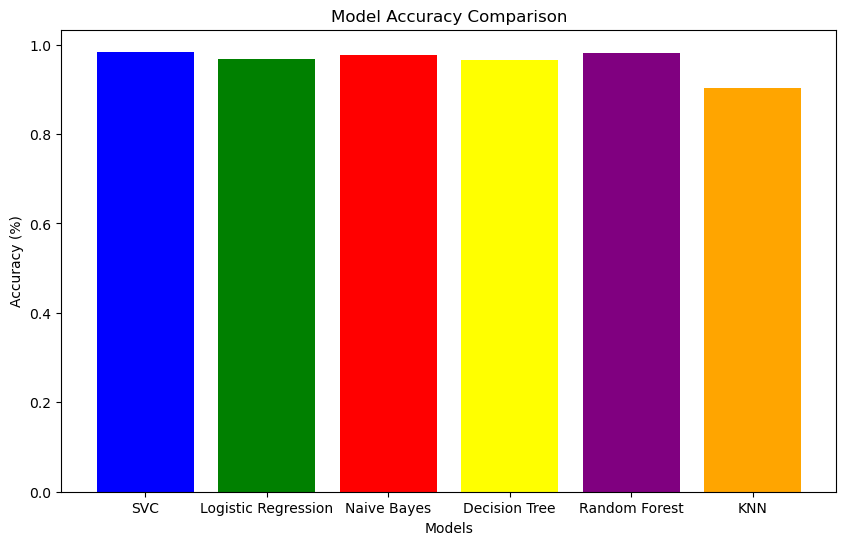

In [102]:
import matplotlib.pyplot as plt


# Assuming you have the model names and their accuracies stored in two lists
model_names = ['SVC', 'Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'KNN']
# accuracies = [90.5, 92.3, 91.8]  # These are just example values

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'yellow', 'purple', 'orange'])

# Add title and labels
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')

# Show the plot
plt.show()